# 音声を録音して、音声波形や周波数の時系列変化を分析する

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [1]:
# AVAudioRecorderを使うためのモジュールを読み込む
from avaudio.avaudio_recorder_record import *

# 録音した音声を保存するファイル名
filename = 'record.wav'

# 5秒間、音声を録音する
avaudio_recorder_record(filename, 5) # ファイル名、録音秒数

/private/var/mobile/Library/Mobile Documents/com~apple~CloudDocs/iosPython/rubicon_objc/ctypes_patch.py:21: UserWarning: rubicon.objc.ctypes_patch has only been tested with Python 3.4 through 3.10. You are using Python 3.11.0. Most likely things will work properly, but you may experience crashes if Python's internals have changed significantly.
  warnings.warn(


/private/var/mobile/Containers/Data/Application/8F0610FD-69C4-4FAF-AEEE-35D68F392742/tmp/ipykernel_1837/1948546060.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(filename)


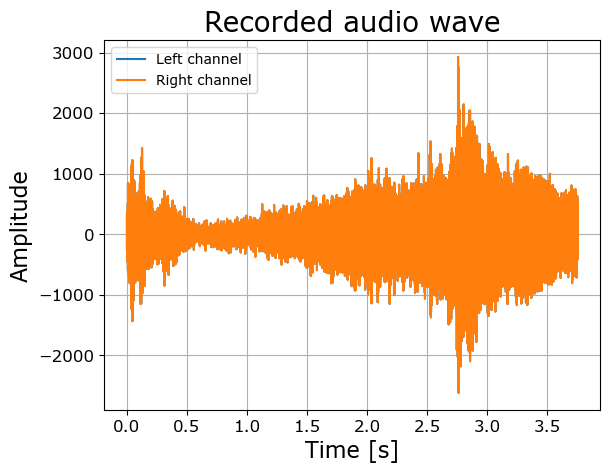

<Figure size 800x400 with 0 Axes>

In [11]:
from scipy.io import wavfile

# 録音した音声ファイルを読み込む
samplerate, data = wavfile.read(filename)
# 録音時間長さ[s] = データ数 / サンプルレート(データ数/録音時間[s])
length = data.shape[0] / samplerate

# matplotlibで音声波形を描く
import matplotlib.pyplot as plt
import numpy as np

# 録音時間分の「横軸（時間）」リストを作る
time = np.linspace(0., length, data.shape[0])

# matplotlibで音声波形を図示する
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.title("Recorded audio wave", fontsize=20)
plt.xlabel("Time [s]", fontsize=16)
plt.ylabel("Amplitude", fontsize=16)
plt.tick_params(labelsize=12)
plt.grid()
plt.figure(figsize=[8,4])
plt.show()

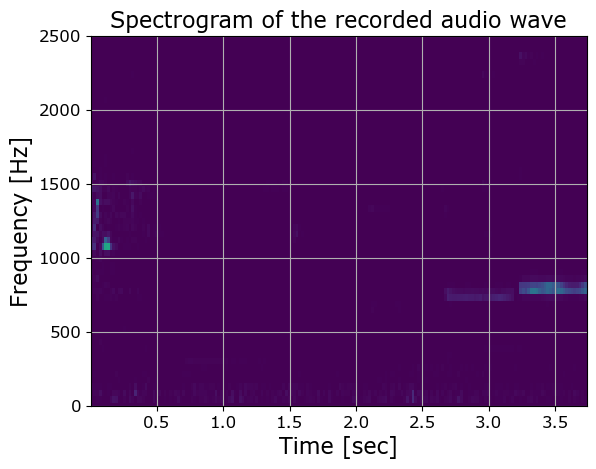

<Figure size 800x400 with 0 Axes>

In [10]:
# scipyのsignalモジュールで、スペクトログラムを図示する
from scipy import signal

# 時間・周波数・強度データを作る
frequencies, times, spectrogram = signal.spectrogram( data[:, 0], samplerate, nperseg=1024)

# matplotlib で図示する
plt.pcolormesh(times, frequencies, spectrogram)
plt.title("Spectrogram of the recorded audio wave", fontsize=16)
plt.ylabel('Frequency [Hz]', fontsize=16)
plt.xlabel('Time [sec]', fontsize=16)
plt.ylim([0,2500])
plt.tick_params(labelsize=12)
plt.grid()
plt.figure(figsize=[8,4])
plt.show()